In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [55]:
df = pd.read_csv("C:/Users/Chinmayi/Downloads/walmart_dataset.csv")

In [4]:
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365


## 1.Problem Statement: Analyzing customer behaviour and to know whether there is a siginificant difference between male and female spending habbits.

In [5]:
df.shape

(550068, 10)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [11]:
#Finding the value counts
df["Gender"].value_counts()
# There are 3 times more males than females

Gender
M    414259
F    135809
Name: count, dtype: int64

In [12]:
df["Age"].value_counts()

Age
26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: count, dtype: int64

In [15]:
df["Occupation"].nunique(), df["Occupation"].min(),df["Occupation"].max()

(21, 0, 20)

In [16]:
df["City_Category"].value_counts()

City_Category
B    231173
C    171175
A    147720
Name: count, dtype: int64

In [17]:
df["Stay_In_Current_City_Years"].value_counts()

Stay_In_Current_City_Years
1     193821
2     101838
3      95285
4+     84726
0      74398
Name: count, dtype: int64

In [18]:
df["Marital_Status"].value_counts()

Marital_Status
0    324731
1    225337
Name: count, dtype: int64

In [19]:
df["Product_Category"].value_counts()

Product_Category
5     150933
1     140378
8     113925
11     24287
2      23864
6      20466
3      20213
4      11753
16      9828
15      6290
13      5549
10      5125
12      3947
7       3721
18      3125
20      2550
19      1603
14      1523
17       578
9        410
Name: count, dtype: int64

In [56]:
## converting data types 
df["User_ID"] = df["User_ID"].astype('category')
df["Product_ID"] = df["Product_ID"].astype('category')
df["Gender"] = df["Gender"].astype('category')
df["Age"] = df["Age"].astype('category')
df["Occupation"] = df["Occupation"].astype('category')
df["City_Category"] = df["City_Category"].astype('category')
df["Product_Category"] = df["Product_Category"].astype('category')
df["Stay_In_Current_City_Years"] = df["Stay_In_Current_City_Years"].astype('category')

In [57]:
# Converting the column 'maritial status' from 0's and 1's into 'unmarried' and 'married'
def func(x):
    if x == 0:
        x = 'unmarried'
    else:
        x = 'married'
    return x
df['Marital_Status'] = df['Marital_Status'].apply(func).astype('category')

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   User_ID                     550068 non-null  category
 1   Product_ID                  550068 non-null  category
 2   Gender                      550068 non-null  category
 3   Age                         550068 non-null  category
 4   Occupation                  550068 non-null  category
 5   City_Category               550068 non-null  category
 6   Stay_In_Current_City_Years  550068 non-null  category
 7   Marital_Status              550068 non-null  category
 8   Product_Category            550068 non-null  category
 9   Purchase                    550068 non-null  int64   
dtypes: category(9), int64(1)
memory usage: 10.3 MB


In [59]:
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,unmarried,3,8370
1,1000001,P00248942,F,0-17,10,A,2,unmarried,1,15200
2,1000001,P00087842,F,0-17,10,A,2,unmarried,12,1422
3,1000001,P00085442,F,0-17,10,A,2,unmarried,12,1057
4,1000002,P00285442,M,55+,16,C,4+,unmarried,8,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,married,20,368
550064,1006035,P00375436,F,26-35,1,C,3,unmarried,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,married,20,137
550066,1006038,P00375436,F,55+,1,C,2,unmarried,20,365


In [31]:
df.describe()

,Purchase
count,550068.000000
mean,9263.968713
std,5023.065394
min,12.000000
25%,5823.000000
50%,8047.000000
75%,12054.000000
max,23961.000000


<Axes: xlabel='Purchase', ylabel='Density'>

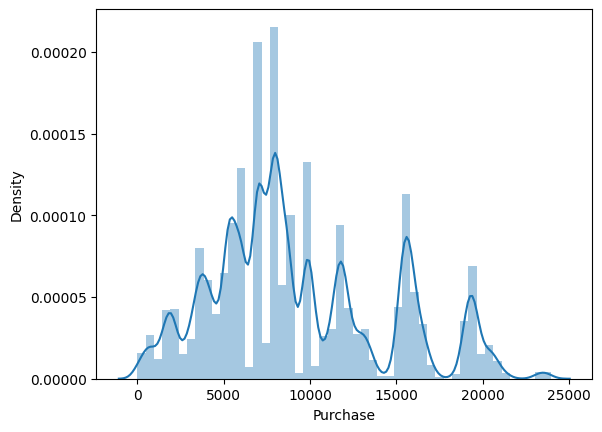

In [32]:
sns.distplot(df['Purchase'])

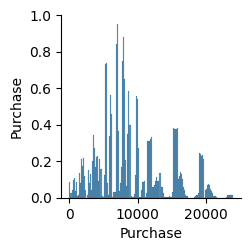

In [34]:
sns.pairplot(df)

# 2. Missing values and outlier detection

In [35]:
#Checking for null values
df.isna().sum().sum()
#There are no null values

0

### Detecting outliers

In [39]:
q1 = np.percentile(df["Purchase"],25)
q2 = np.percentile(df["Purchase"],75)
iqr = 1.5*(q2 - q1)
low = max(q1 - iqr,0)
high = q2 + iqr
outliers = df["Purchase"][(df["Purchase"]>high) | (df["Purchase"]<low)]

No of outliers is: 2677


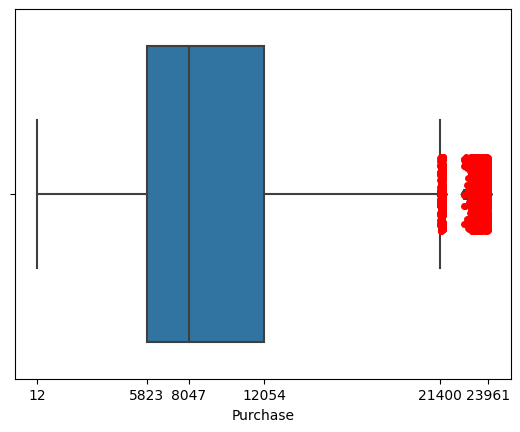

In [53]:
#Outliers in "Age" column
sns.boxplot(x = df["Purchase"])
sns.stripplot(x = outliers, color = "red")
plt.xticks([np.min(df["Purchase"]),np.median(df["Purchase"]), np.max(df["Purchase"]), q1,q2, high ])
print("No of outliers is: {}".format(outliers.count()))

In [44]:
outliers.count()

2677

# 3. Exploratory Data Analysis

In [60]:
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,unmarried,3,8370
1,1000001,P00248942,F,0-17,10,A,2,unmarried,1,15200
2,1000001,P00087842,F,0-17,10,A,2,unmarried,12,1422
3,1000001,P00085442,F,0-17,10,A,2,unmarried,12,1057
4,1000002,P00285442,M,55+,16,C,4+,unmarried,8,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,married,20,368
550064,1006035,P00375436,F,26-35,1,C,3,unmarried,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,married,20,137
550066,1006038,P00375436,F,55+,1,C,2,unmarried,20,365


In [62]:
#The average amount spent for females
np.mean(df.loc[df["Gender"]=="F", "Purchase"])

8734.565765155476

In [63]:
#The average amount spent for males
np.mean(df.loc[df["Gender"]=="M", "Purchase"])

#We observe that males spend aroud 7000 dollars more than females.
#Whether this is my chance or if there is a significant difference will be answered later.

9437.526040472265

<Axes: xlabel='Occupation', ylabel='Purchase'>

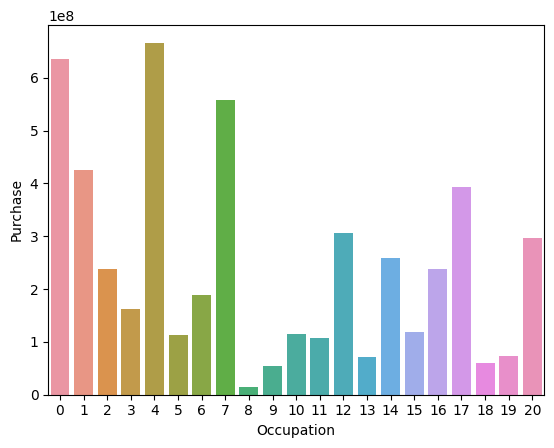

In [86]:
series = df.groupby('Occupation')['Purchase'].sum().reset_index()
sns.barplot(data = series, x = 'Occupation', y = 'Purchase')
# We observe that occupation 0,4 and 7 make the most purchases.

<Axes: xlabel='Age', ylabel='Purchase'>

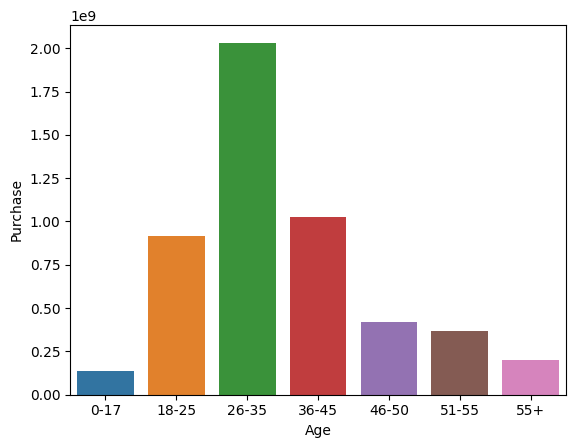

In [87]:
series = df.groupby('Age')['Purchase'].sum().reset_index()
sns.barplot(data = series, x = 'Age', y = 'Purchase')
# Age group 26-35 spend the most.

In [198]:
df.groupby('Age')['Purchase'].sum()

Age
0-17      134913183
18-25     913848675
26-35    2031770578
36-45    1026569884
46-50     420843403
51-55     367099644
55+       200767375
Name: Purchase, dtype: int64

<Axes: xlabel='City_Category', ylabel='Purchase'>

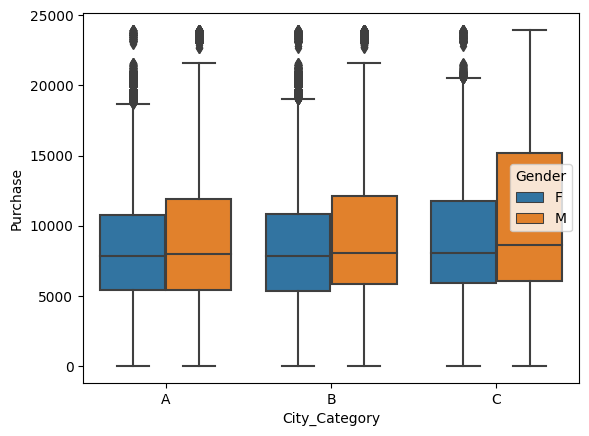

In [71]:
sns.boxplot(df, x = 'City_Category' ,y = df["Purchase"], hue = 'Gender')
# We don't observe any difference in purchase value between city A and B.
# However we see that from city C, there is much greater purchase value.
# In all cities though, males spend on expensive items than females.

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='Purchase'>

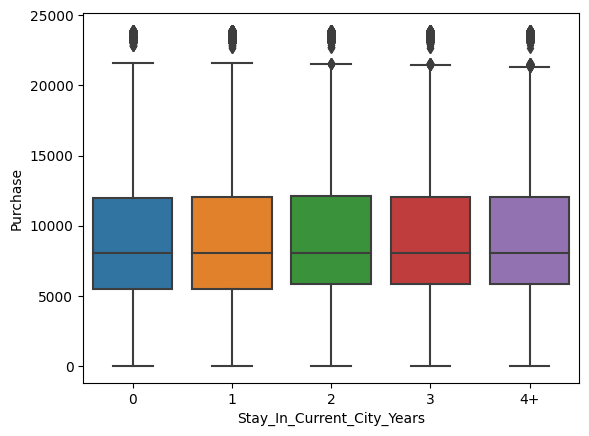

In [72]:
sns.boxplot(df, x = 'Stay_In_Current_City_Years' ,y = df["Purchase"])
# We don't see any significant difference.

<Axes: xlabel='Purchase', ylabel='Marital_Status'>

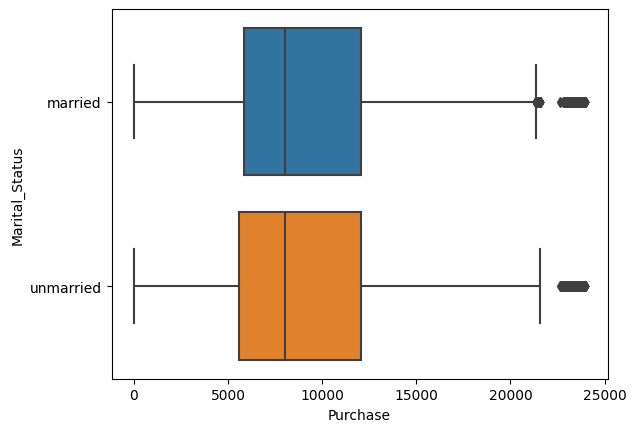

In [74]:
sns.boxplot(df, x = df["Purchase"] ,y = 'Marital_Status')
# We don't see any significant difference.

<Axes: xlabel='Product_Category', ylabel='Purchase'>

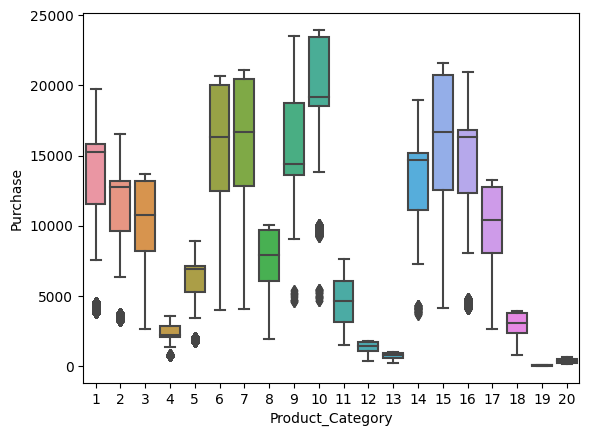

In [76]:
sns.boxplot(df, x = df["Product_Category"] ,y = 'Purchase')
# Some products are very expensive, some are cheap.

# 4.1 Do women spend more than men?

In [88]:
#The average amount spent for females
np.mean(df.loc[df["Gender"]=="F", "Purchase"])


8734.565765155476

In [89]:
#The average amount spent for males
np.mean(df.loc[df["Gender"]=="M", "Purchase"])

9437.526040472265

## Is the difference between the two samples significant or just by chance

In [115]:
from scipy.stats import ttest_ind
from scipy.stats import norm

In [103]:
#H0: Women spend same amount of money as men.
#Ha: Women spend less amount of money than men.
tstat, p = ttest_ind(df.loc[df["Gender"]=="F", "Purchase"], df.loc[df["Gender"]=="M", "Purchase"], alternative = 'less')
print("p_value: ",p)
if p<0.05:
    print('reject null hypothesis')
else:
    print('failed to reject null hypothesis')

p_value:  0.0
reject null hypothesis


### We find that there is a significant difference between the amount spent by male and female customers. And infact we have a strong evidence that women spend less than men. 

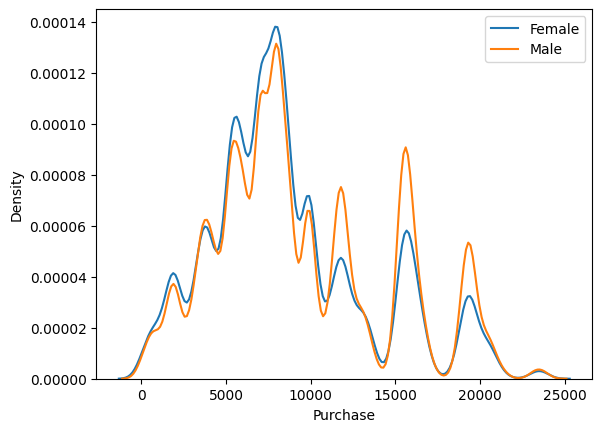

In [193]:
sns.kdeplot(df.loc[df["Gender"]=="F", "Purchase"], label = "Female")
sns.kdeplot(df.loc[df["Gender"]=="M", "Purchase"], label = "Male")
plt.legend()
# We see that no. of transactions is more for women where the purchase value is less, and men purchase more higher value items.

# 4.2 Confidence Interval for male and female customers.

## Let us seperately calculate the confidence interval for male and female customers. Since we have the sample data, we will assume actual population mean will be equal to sample mean.

### Female Customers:

In [150]:
sample_mean_female = np.mean(df.loc[df["Gender"]=="F", "Purchase"])
sample_std_deviation_f = np.std(df.loc[df["Gender"]=="F", "Purchase"])
population_mean_female = sample_mean_female
mean_std_dev_f = sample_std_deviation_f/np.sqrt(len(df.loc[df["Gender"]=="F", "Purchase"]))

In [151]:
# 90% Confidence interval
i1,i2 = norm.interval(0.9, loc = population_mean_female, scale = mean_std_dev_f)
i1,i2 

(8713.28791298587, 8755.843617325081)

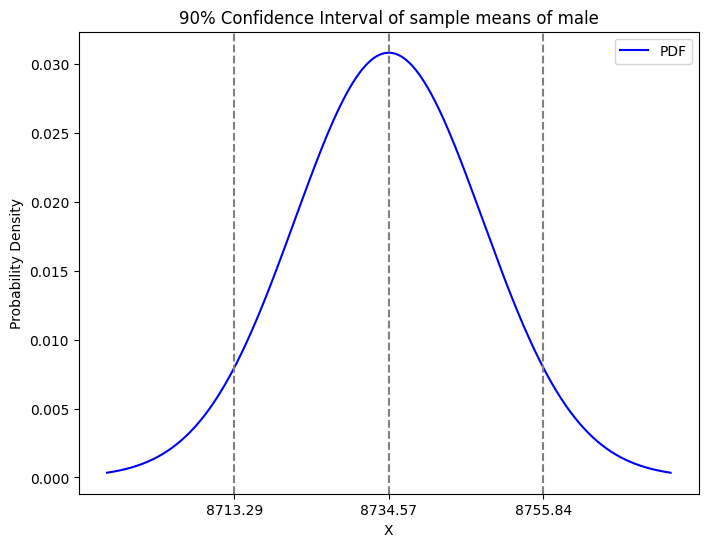

In [154]:
# Generating the normal distribution of sample means.
# Generate data points for the x-axis (range of values)
x = np.linspace(population_mean_female - 3*mean_std_dev_f, population_mean_female + 3*mean_std_dev_f, 1000)

# Create a Matplotlib figure and axis
plt.figure(figsize=(8, 6))
plt.title('90% Confidence Interval of sample means of female')
plt.xlabel('X')
plt.ylabel('Probability Density')

# Plot the normal distribution using matplotlib's norm.pdf function
plt.plot(x, norm.pdf(x, population_mean_female, mean_std_dev_f), color='blue', label='PDF')
plt.xticks([population_mean_female,i1,i2])
for val in [population_mean_female, i1, i2]:
    plt.axvline(x = val, linestyle='--', color='gray')
# Show the plot
plt.legend()
plt.show()


In [155]:
# 95% Confidence interval
i1,i2 = norm.interval(0.95, loc = population_mean_female, scale = mean_std_dev_f)
i1,i2

(8709.211640485983, 8759.919889824969)

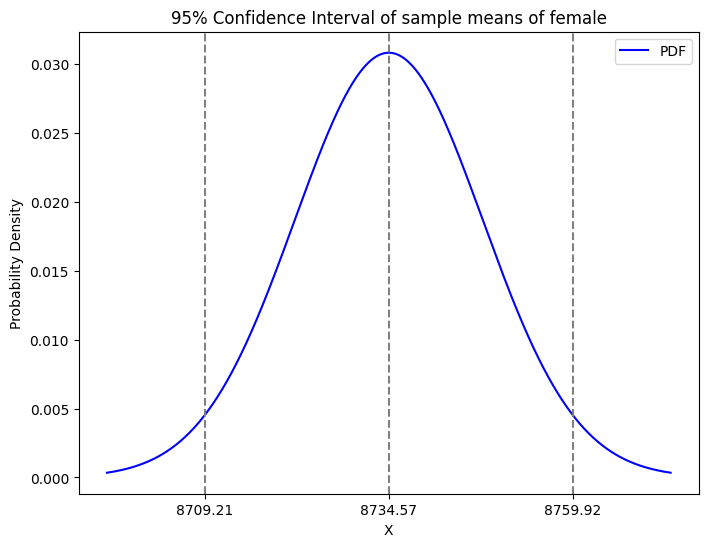

In [156]:
# Generating the normal distribution of sample means.
# Generate data points for the x-axis (range of values)
x = np.linspace(population_mean_female - 3*mean_std_dev_f, population_mean_female + 3*mean_std_dev_f, 1000)

# Create a Matplotlib figure and axis
plt.figure(figsize=(8, 6))
plt.title('95% Confidence Interval of sample means of female')
plt.xlabel('X')
plt.ylabel('Probability Density')

# Plot the normal distribution using matplotlib's norm.pdf function
plt.plot(x, norm.pdf(x, population_mean_female, mean_std_dev_f), color='blue', label='PDF')
plt.xticks([population_mean_female,i1,i2])
for val in [population_mean_female, i1, i2]:
    plt.axvline(x = val, linestyle='--', color='gray')
# Show the plot
plt.legend()
plt.show()


In [157]:
# 99% Confidence interval
i1,i2 = norm.interval(0.99, loc = population_mean_female, scale = mean_std_dev_f)
i1,i2 

(8701.244797114914, 8767.886733196037)

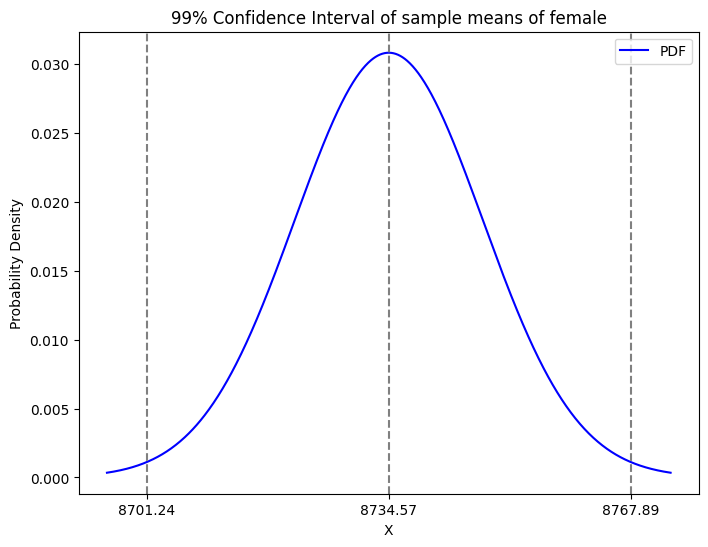

In [158]:
# Generating the normal distribution of sample means.
# Generate data points for the x-axis (range of values)
x = np.linspace(population_mean_female - 3*mean_std_dev_f, population_mean_female + 3*mean_std_dev_f, 1000)

# Create a Matplotlib figure and axis
plt.figure(figsize=(8, 6))
plt.title('99% Confidence Interval of sample means of female')
plt.xlabel('X')
plt.ylabel('Probability Density')

# Plot the normal distribution using matplotlib's norm.pdf function
plt.plot(x, norm.pdf(x, population_mean_female, mean_std_dev_f), color='blue', label='PDF')
plt.xticks([population_mean_female,i1,i2])
for val in [population_mean_female, i1, i2]:
    plt.axvline(x = val, linestyle='--', color='gray')
# Show the plot
plt.legend()
plt.show()


### Male Customers:

In [126]:
sample_mean_male = np.mean(df.loc[df["Gender"]=="M", "Purchase"])
sample_std_deviation_m = np.std(df.loc[df["Gender"]=="M", "Purchase"])
population_mean_male = sample_mean_male
mean_std_dev_m = sample_std_deviation_m/np.sqrt(len(df.loc[df["Gender"]=="M", "Purchase"]))

In [141]:
# 90% Confidence interval
i1,i2 = norm.interval(0.9, loc = population_mean_male, scale = mean_std_dev_m)
i1,i2

(9424.51251301251, 9450.539567932019)

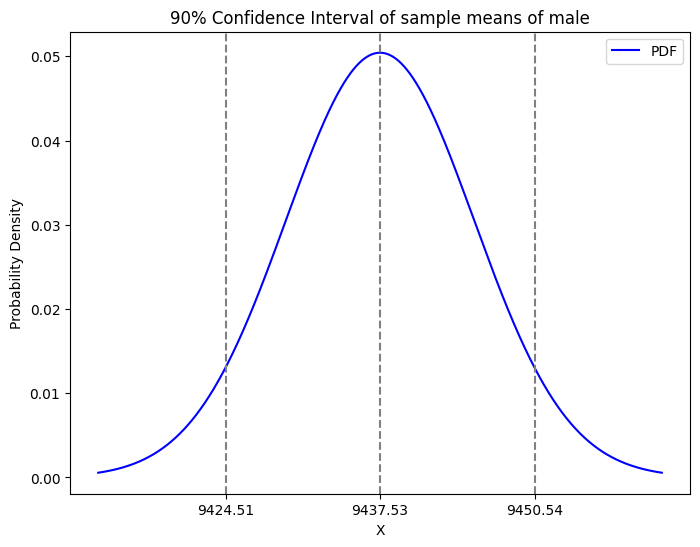

In [144]:
# Generating the normal distribution of sample means.
# Generate data points for the x-axis (range of values)
x = np.linspace(population_mean_male - 3*mean_std_dev_m, population_mean_male + 3*mean_std_dev_m, 1000)

# Create a Matplotlib figure and axis
plt.figure(figsize=(8, 6))
plt.title('90% Confidence Interval of sample means of male')
plt.xlabel('X')
plt.ylabel('Probability Density')

# Plot the normal distribution using matplotlib's norm.pdf function
plt.plot(x, norm.pdf(x, population_mean_male, mean_std_dev_m), color='blue', label='PDF')
plt.xticks([population_mean_male,i1,i2])
for val in [population_mean_male, i1, i2]:
    plt.axvline(x = val, linestyle='--', color='gray')
# Show the plot
plt.legend()
plt.show()


In [146]:
# 95% Confidence interval
i1,i2 = norm.interval(0.95, loc = population_mean_male, scale = mean_std_dev_m)
i1,i2 

(9422.019466078644, 9453.032614865886)

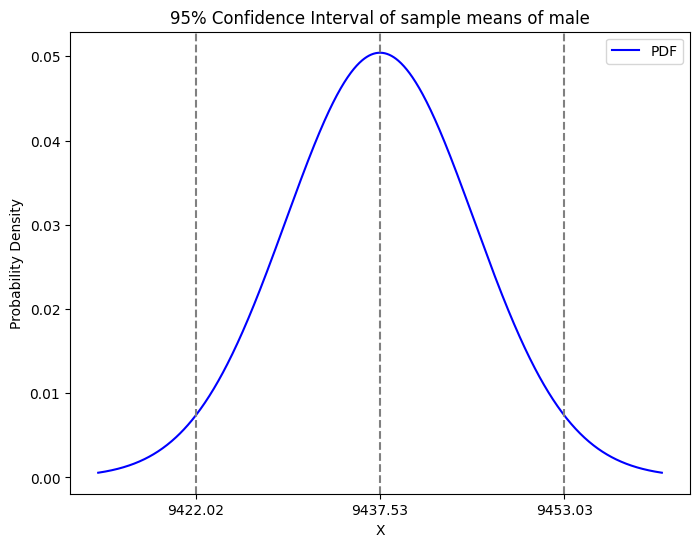

In [147]:
# Generating the normal distribution of sample means.
# Generate data points for the x-axis (range of values)
x = np.linspace(population_mean_male - 3*mean_std_dev_m, population_mean_male + 3*mean_std_dev_m, 1000)

# Create a Matplotlib figure and axis
plt.figure(figsize=(8, 6))
plt.title('95% Confidence Interval of sample means of male')
plt.xlabel('X')
plt.ylabel('Probability Density')

# Plot the normal distribution using matplotlib's norm.pdf function
plt.plot(x, norm.pdf(x, population_mean_male, mean_std_dev_m), color='blue', label='PDF')
plt.xticks([population_mean_male,i1,i2])
for val in [population_mean_male, i1, i2]:
    plt.axvline(x = val, linestyle='--', color='gray')
# Show the plot
plt.legend()
plt.show()


In [148]:
# 99% Confidence interval
i1, i2 = norm.interval(0.99, loc = population_mean_male, scale = mean_std_dev_m)
i1, i2 

(9417.146947266567, 9457.905133677963)

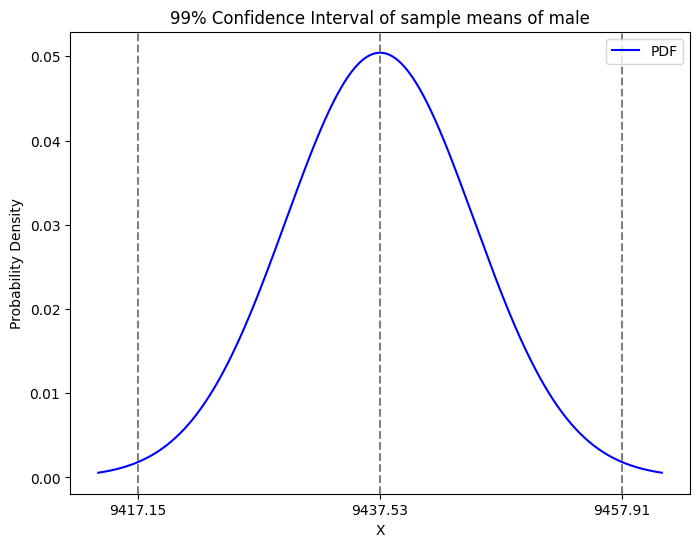

In [149]:
# Generating the normal distribution of sample means.
# Generate data points for the x-axis (range of values)
x = np.linspace(population_mean_male - 3*mean_std_dev_m, population_mean_male + 3*mean_std_dev_m, 1000)

# Create a Matplotlib figure and axis
plt.figure(figsize=(8, 6))
plt.title('99% Confidence Interval of sample means of male')
plt.xlabel('X')
plt.ylabel('Probability Density')

# Plot the normal distribution using matplotlib's norm.pdf function
plt.plot(x, norm.pdf(x, population_mean_male, mean_std_dev_m), color='blue', label='PDF')
plt.xticks([population_mean_male,i1,i2])
for val in [population_mean_male, i1, i2]:
    plt.axvline(x = val, linestyle='--', color='gray')
# Show the plot
plt.legend()
plt.show()


## 4.3 There is no overlapping confidence interval between male and female customers from the results got in the analysis.

### Targeted Marketing Campaigns: Walmart can create tailored marketing campaigns that specifically target the preferences and spending patterns of each gender. 
### Pricing Strategy: Walmart can change the price of certain products that appeal to a particular gender, so as to increase the profits.

## 4.4 Married vs Unmarried spending analysis.

In [160]:
#H0: Married people spend same amount of money as Unmarried people.
#Ha: Married people spend different amount of money than Unmarried people.
tstat, p = ttest_ind(df.loc[df["Marital_Status"]=="unmarried", "Purchase"], df.loc[df["Marital_Status"]=="unmarried", "Purchase"], alternative = 'two-sided')
print("p_value: ",p)
if p<0.05:
    print('reject null hypothesis')
else:
    print('failed to reject null hypothesis')

p_value:  1.0
failed to reject null hypothesis


In [168]:
# Mean purchase value of Married people
np.mean(df.loc[df["Marital_Status"]=="married", "Purchase"])

9261.174574082374

In [169]:
# Mean purchase value of Unmarried people
np.mean(df.loc[df["Marital_Status"]=="unmarried", "Purchase"])

9265.907618921507

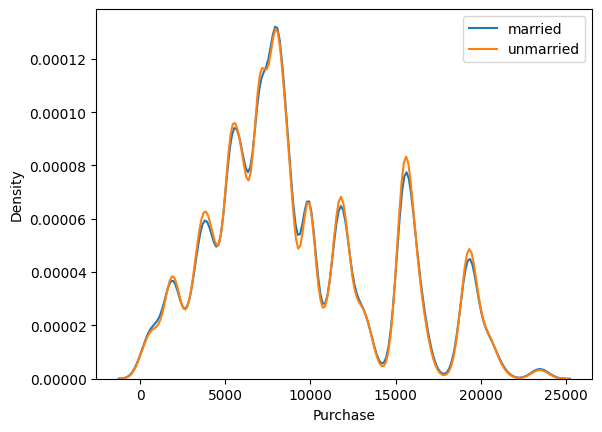

In [173]:
sns.kdeplot(df.loc[df["Marital_Status"]=="married", "Purchase"], label = 'married')
sns.kdeplot(df.loc[df["Marital_Status"]=="unmarried", "Purchase"], label = 'unmarried')
plt.legend()
# We see unmarried people slightly spending more than married ones, from the graph and by calculating the means aswell.

## From the t-test, we observe p-value is almost 1. Therefore we fail to reject null hypothesis. Therefore we see that there is no significant difference between the spending pattern of unmarried and married people.

# 4.5 Spending patterns for different ages.

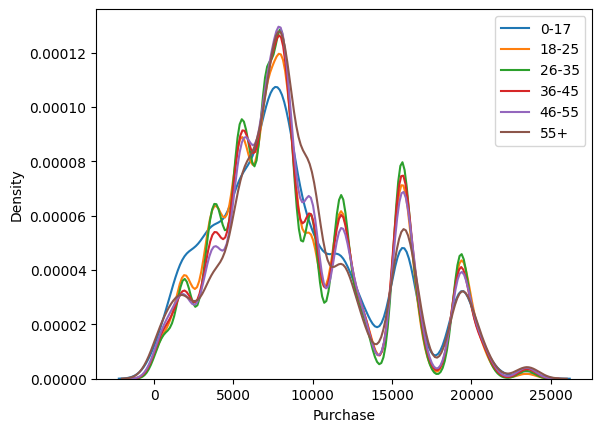

In [179]:
sns.kdeplot(df.loc[df["Age"]=="0-17", "Purchase"], label = '0-17')
sns.kdeplot(df.loc[df["Age"]=="18-25", "Purchase"], label = '18-25')
sns.kdeplot(df.loc[df["Age"]=="26-35", "Purchase"], label = '26-35')
sns.kdeplot(df.loc[df["Age"]=="36-45", "Purchase"], label = '36-45')
sns.kdeplot(df.loc[(df["Age"]=="46-50")|(df["Age"]=='51-55'), "Purchase"], label = '46-55')
sns.kdeplot(df.loc[df["Age"]=="55+", "Purchase"], label = '55+')
plt.legend()
# We see unmarried people slightly spending more than married ones, from the graph and by calculating the means aswell.

In [181]:
# Since we have multiple samples, we will use ANOVA test.
from scipy.stats import f_oneway
x_stat, p_value = f_oneway(df.loc[df["Age"]=="0-17", "Purchase"],
                          df.loc[df["Age"]=="18-25", "Purchase"],
                          df.loc[df["Age"]=="26-35", "Purchase"],
                          df.loc[df["Age"]=="36-45", "Purchase"],
                          df.loc[(df["Age"]=="46-50")|(df["Age"]=='51-55'), "Purchase"],
                          df.loc[df["Age"]=="55+", "Purchase"])
x_stat, p_value

(31.055078994015435, 1.0157569352609838e-31)

In [184]:
#H0: All age groups spend same amount.
#Ha: Different age groups spend different amounts.
if p_value<0.05:
    print('reject null hypothesis')
else:
    print('failed to reject null hypothesis')

reject null hypothesis


## ANOVA test for city type

In [196]:
#H0: People from different cities spend same amount
#Ha: People from different cities spend different amounts.
x_stat, p_value = f_oneway(df.loc[df["City_Category"]=="A", "Purchase"],
                          df.loc[df["City_Category"]=="B", "Purchase"],
                          df.loc[df["City_Category"]=="C", "Purchase"])
x_stat, p_value

print("p-value: {}".format(p_value))
print("Mean spending of City A: {}".format(np.mean(df.loc[df["City_Category"]=="A", "Purchase"])))
print("Mean spending of City B: {}".format(np.mean(df.loc[df["City_Category"]=="B", "Purchase"])))
print("Mean spending of City C: {}".format(np.mean(df.loc[df["City_Category"]=="C", "Purchase"])))
if p_value<0.05:
    print('reject null hypothesis')
else:
    print('failed to reject null hypothesis')
# We see spending habbits are different in different cities.

p-value: 0.0
Mean spending of City A: 8911.939216084484
Mean spending of City B: 9151.300562781986
Mean spending of City C: 9719.92099313568
reject null hypothesis


In [185]:
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,unmarried,3,8370
1,1000001,P00248942,F,0-17,10,A,2,unmarried,1,15200
2,1000001,P00087842,F,0-17,10,A,2,unmarried,12,1422
3,1000001,P00085442,F,0-17,10,A,2,unmarried,12,1057
4,1000002,P00285442,M,55+,16,C,4+,unmarried,8,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,married,20,368
550064,1006035,P00375436,F,26-35,1,C,3,unmarried,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,married,20,137
550066,1006038,P00375436,F,55+,1,C,2,unmarried,20,365


## We observe from the ANOVA test that different age groups have different spending habbits.

# Insights:

## 1. Most of the purchases lie between 5800 and 12000.

## 2. Men spend significantly more than women.

## 3. People with certain occupation like 0,4 and 7 spend more than others.

## 4. Age group 26-35 spend significantly more than other age groups.

## 5. Maritial status has no effect on spending behaviour.

## 6. Number of years in a city has not effect on spending behaviour.

## 7. Spending habbits are different for people from different cities.

## 8. There is no overlapping range in the confidence interval of male and female spending.

# Recommendations

## 1. Inventory Management: The business can optimize its inventory management based on the preferences of each gender. By stocking products that are popular among each group, the business can reduce overstocking of less popular items and improve turnover rates.

## 2. Personalized adveertisements: People from different cities have different cultural background. Unique adds can be shown to people which resonates with their background.

## 3. Visual Merchandising: Physical stores can arrange their displays to cater to the preferences of each gender. This could lead to more appealing shopping experiences and increased sales.

## 4. Targeted Marketing Campaigns: Walmart can create tailored marketing campaigns that specifically target the preferences and spending patterns of each gender. 
## 5. Pricing Strategy: Walmart can change the price of certain products that appeal to a particular gender, so as to increase the profits.

## 6. Segregating products: Products which cater to different genders can be seperated at the stores, so that customers purchasing a product, might stumble upon other products and buy them.

## 7. Forming partnerships or collaborations with other companies that target specific genders could lead to mutually beneficial marketing initiatives.

## 8. Diversity and Inclusion: Using this information ethically, the business can also ensure it is promoting diversity and inclusion in its marketing, product offerings, and overall operations.

## 9. Walmart shouldn't focus too much on segregating customers based on maritial status.

## 10. Certain kind of expensive items like, furniture, electronics can be recommended more to male audience, because product categories and price does affect spending behaviour between male and female.